# MT Car Dataset

#### <span style="color:green">Question - 1. </span> Is a car with automatic or manual transmission better in term of miles per gallons (mpg)?

#### <span style="color:green">Question - 2. </span>  Quantify the *mpg* difference between automatic and manual transmission

- mpg - mile per gallon

# 1. Univarient Analysis

- I focus on analyzing the target variable (mpg) alone by splitting the observations into two groups, i.e. cars wtih automatic or manual transmission. I will execute 2 analysis
- Validate if the difference of the group means is statistically significant by computing a 95% confidence interval for means difference.

### Automatic vs Manual Transmission 
in terms of miles per gallon (mpg)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn')

**Load Dataset**

In [4]:
mtcar = pd.read_excel('./data/MTcars.xlsx')
mtcar.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


|coloumns | description |
|---------|-------------|
|mpg	|Miles/(US) gallon
|cyl	|Number of cylinders
|disp	|Displacement (cu.in.)
|hp	|Gross horsepower
|drat	|Rear axle ratio
|wt	|Weight (1000 lbs)
|qsec|	1/4 mile time
|vs|	V/S
|am	|Transmission (0 = automatic, 1 = manual)
|gear|	Number of forward gears
|carb|	Number of carburetors


# Lets see how Transmission related to miles/galon

- Target variable = mile per galon
- independent variable = transmission

> **Distribution of cars miles per gallon**

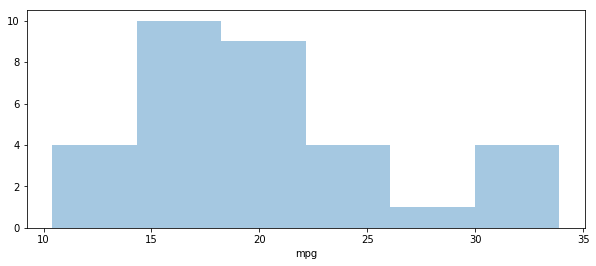

In [5]:
fig,ax = plt.subplots(figsize =(10,4))
sns.distplot(mtcar['mpg'],ax=ax,kde=False)
plt.show()

- Range of mileage of cars is from 10 -33 mpg


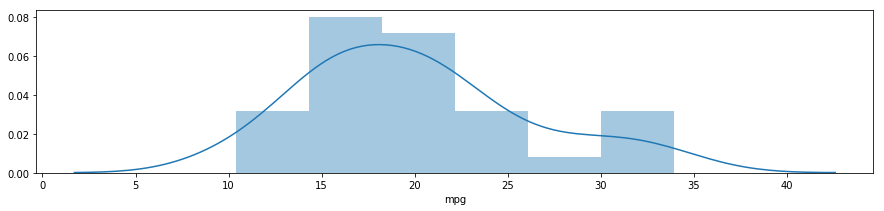

In [6]:
fig,ax = plt.subplots(figsize =(15,3))
sns.distplot(mtcar['mpg'],ax=ax,kde=True)
plt.show()

- KDE : Kernel Density Estimation
> will estimate histogram considering infinite values, y-axis = probability values

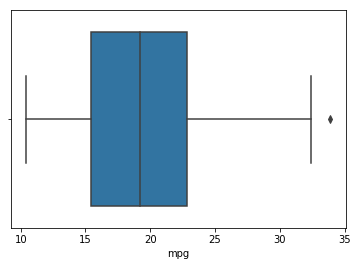

In [7]:
sns.boxplot(x="mpg",data=mtcar)

- Box plot also explain kde plot

In [8]:
mtcar['mpg'].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

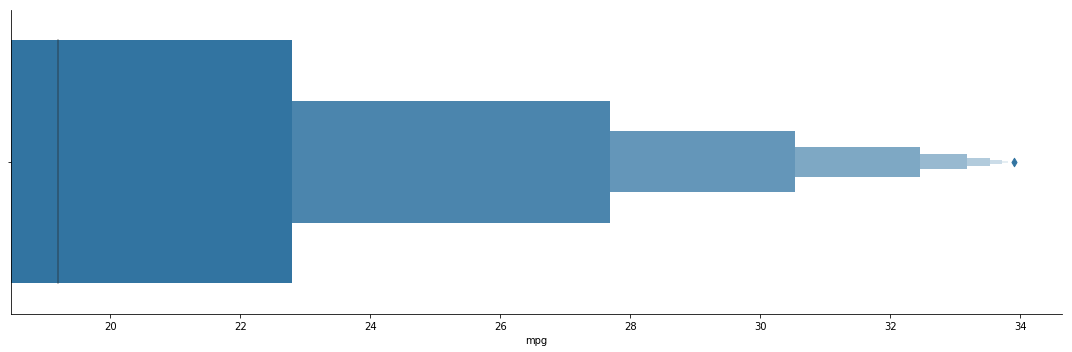

In [9]:
sns.catplot(x="mpg",kind='boxen',data=mtcar,aspect=3)

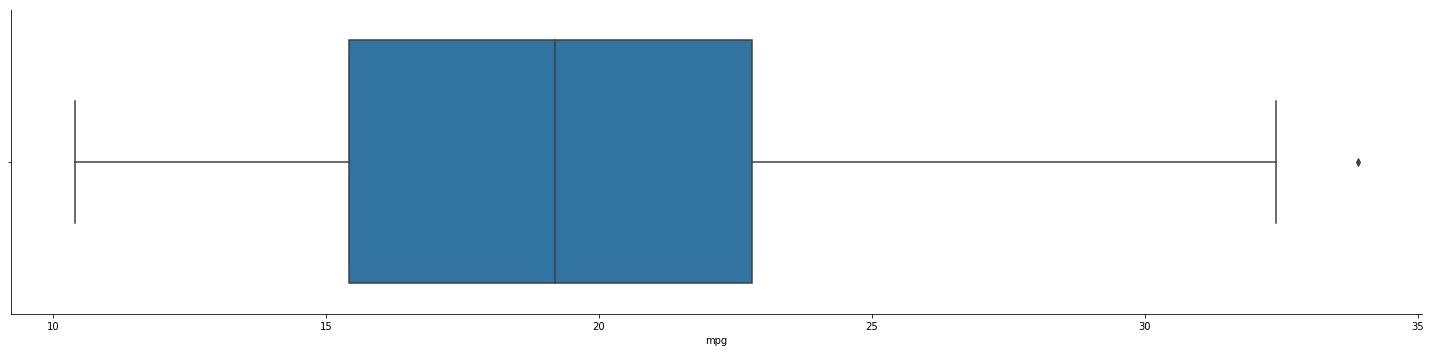

In [10]:
sns.catplot(x="mpg",kind='box',data=mtcar,aspect=4)

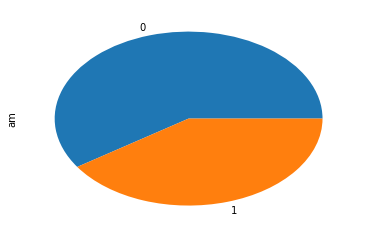

In [13]:
mtcar['am'].value_counts().plot(kind='pie')

0    19
1    13
Name: am, dtype: int64


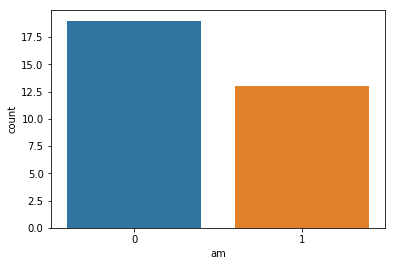

In [102]:
sns.countplot(x='am',data=mtcar)
print(mtcar['am'].value_counts())

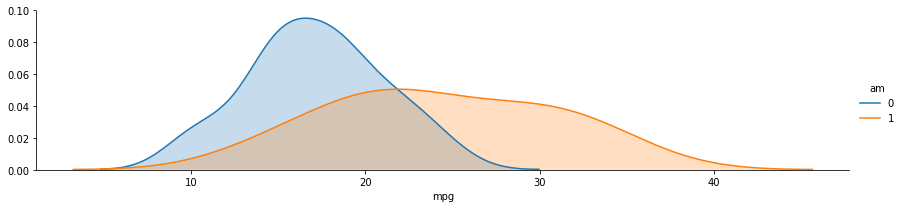

In [32]:
fig = sns.FacetGrid(mtcar,hue='am',aspect=4)
fig.map(sns.kdeplot,'mpg',shade= True)
fig.add_legend()
plt.show()

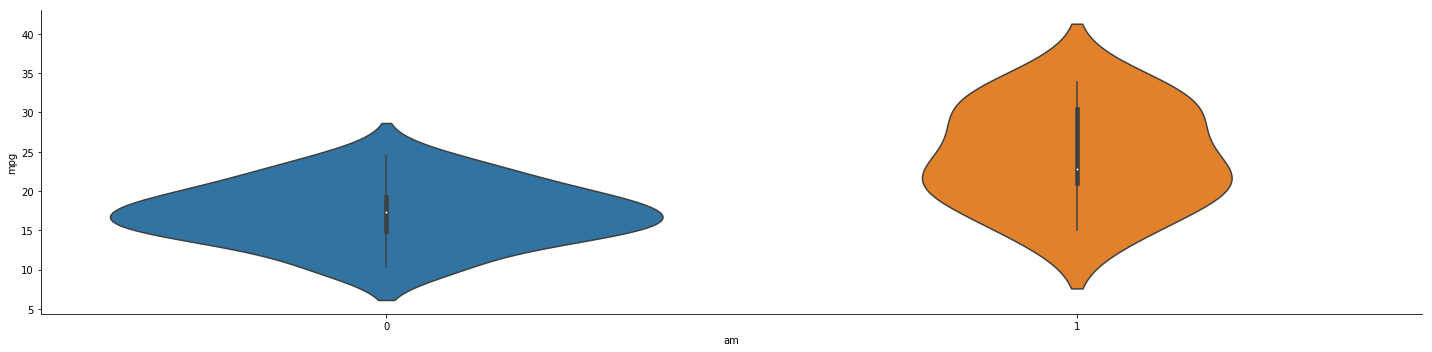

In [89]:
sns.catplot(x="am",y='mpg',kind='violin',data=mtcar,aspect=4)

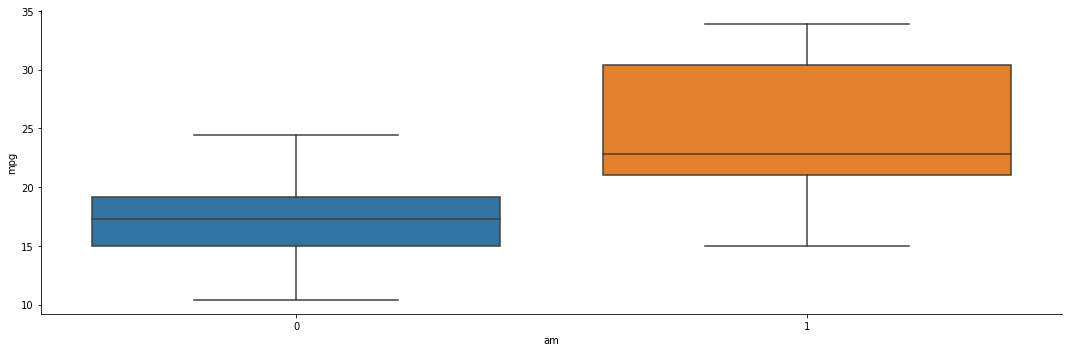

In [46]:
sns.catplot(x='am',y="mpg",kind='box',data=mtcar,aspect=3)
plt.show()

cond1 = mtcar.am==1 # selecting manual car
cond2 = mtcar.am==0 # automatic car

mtcar[cond1]['mpg'].describe()

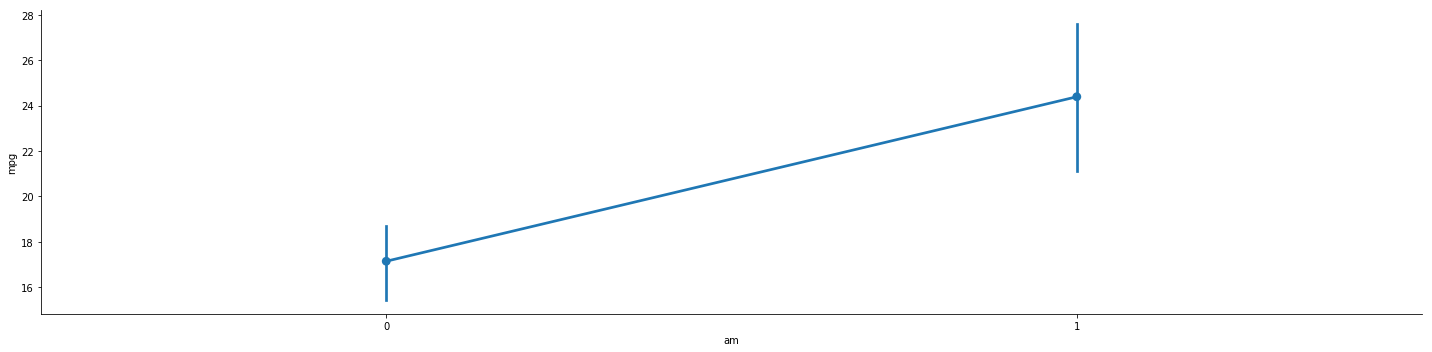

In [44]:
sns.catplot(x="am", y="mpg", kind="point", data=mtcar,aspect=4)

In [51]:
print('**Automatic Car**\n',mtcar[mtcar.am==0]['mpg'].describe())
print('='*20)
print('**Manual Car**\n',mtcar[mtcar.am==1]['mpg'].describe())

**Automatic Car**
 count    19.000000
mean     17.147368
std       3.833966
min      10.400000
25%      14.950000
50%      17.300000
75%      19.200000
max      24.400000
Name: mpg, dtype: float64
**Manual Car**
 count    13.000000
mean     24.392308
std       6.166504
min      15.000000
25%      21.000000
50%      22.800000
75%      30.400000
max      33.900000
Name: mpg, dtype: float64


#### *Transmission with Manual gear has good mileage compared with automatic gear*

# mpg vs carb

In [94]:
mtcar.keys()

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64


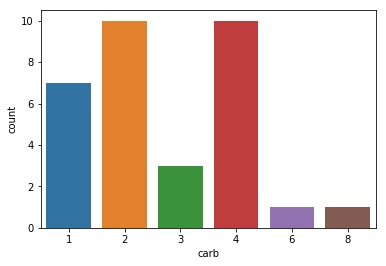

In [101]:
sns.countplot(x='carb',data=mtcar)
print(mtcar['carb'].value_counts())

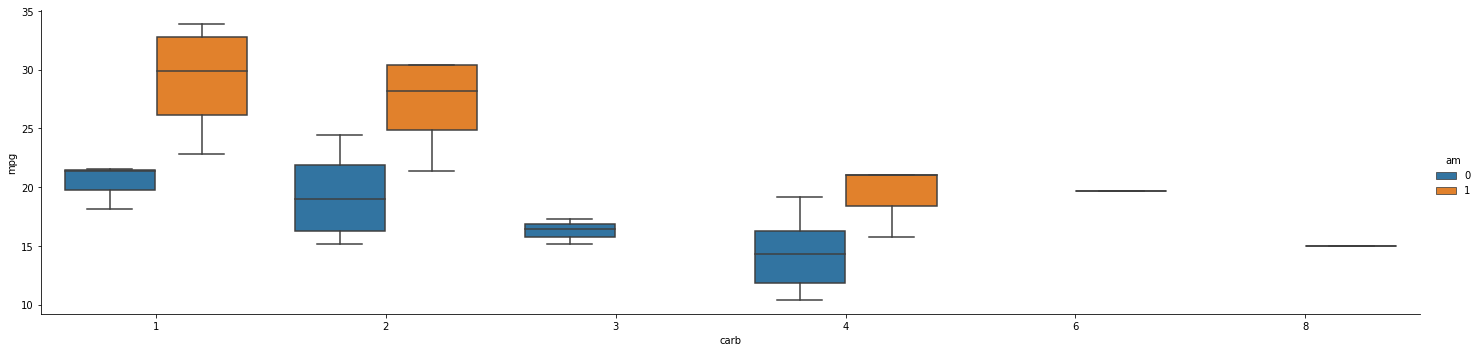

In [50]:
sns.catplot(x='carb',y='mpg',hue='am',data=mtcar,kind='box',aspect=4)

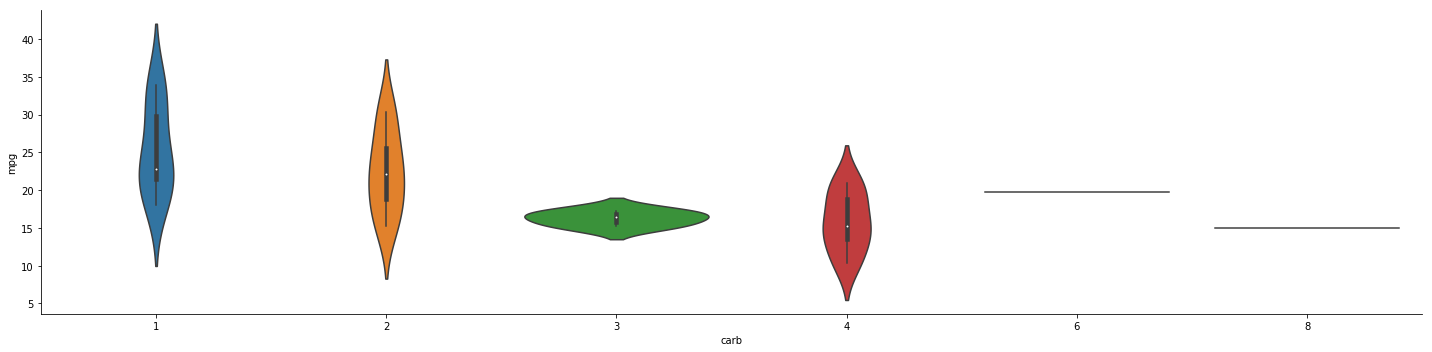

In [104]:
sns.catplot(x='carb',y='mpg',data=mtcar,kind='violin',aspect=4)

### Notes:

# Bivarient Analysis
## mpg vs (am, carb)

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64


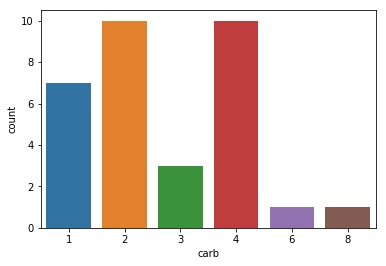

In [116]:
sns.countplot(x='carb',data=mtcar)
print(mtcar['carb'].value_counts())

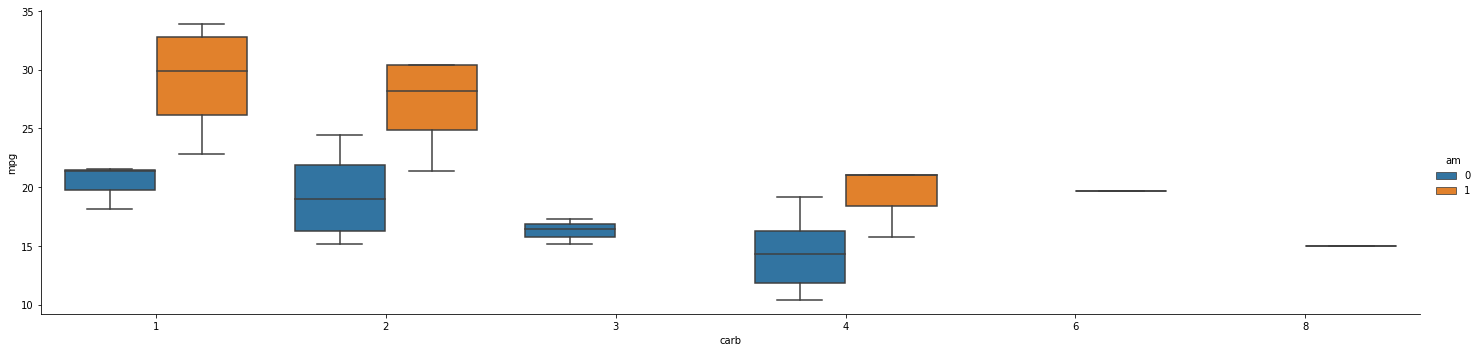

In [117]:
sns.catplot(x='carb',y='mpg',hue='am',kind='box',data=mtcar,aspect=4)

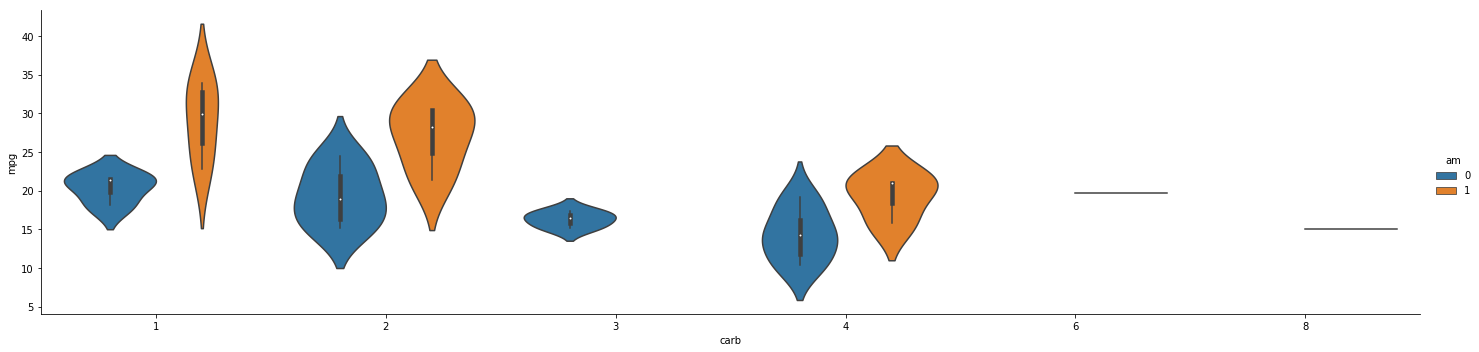

In [111]:
# violin plot
sns.catplot(x='carb',y='mpg',hue='am',kind='violin',data=mtcar,aspect=4)

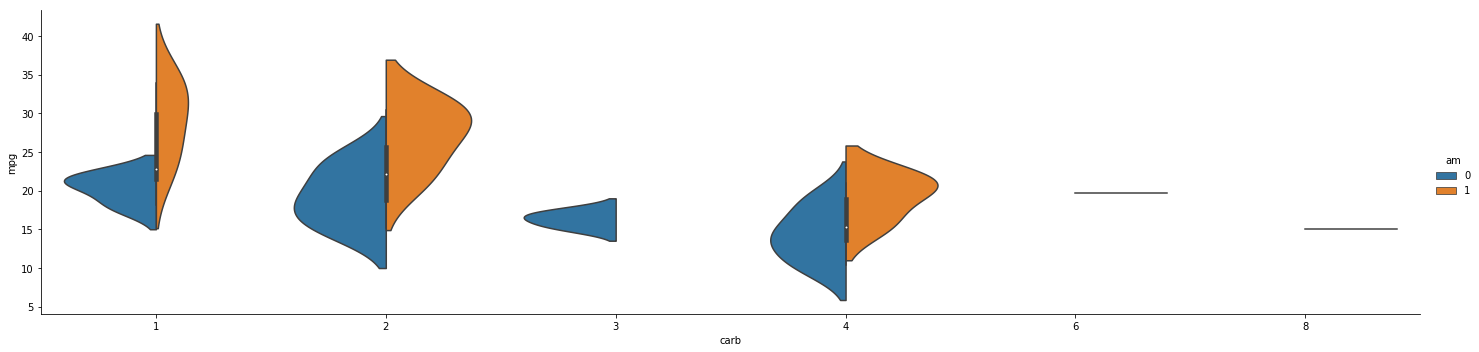

In [112]:
# violin plot split data
sns.catplot(x='carb',y='mpg',hue='am',kind='violin',split=True,data=mtcar,aspect=4)

# Bivarient Analysis
## mpg vs (am, gear)

3    15
4    12
5     5
Name: gear, dtype: int64


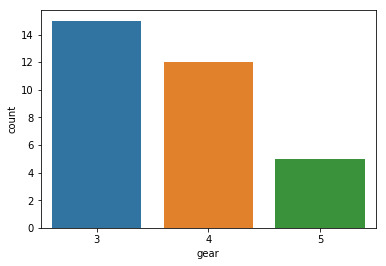

In [121]:
sns.countplot(x='gear',data=mtcar)
print(mtcar['gear'].value_counts())

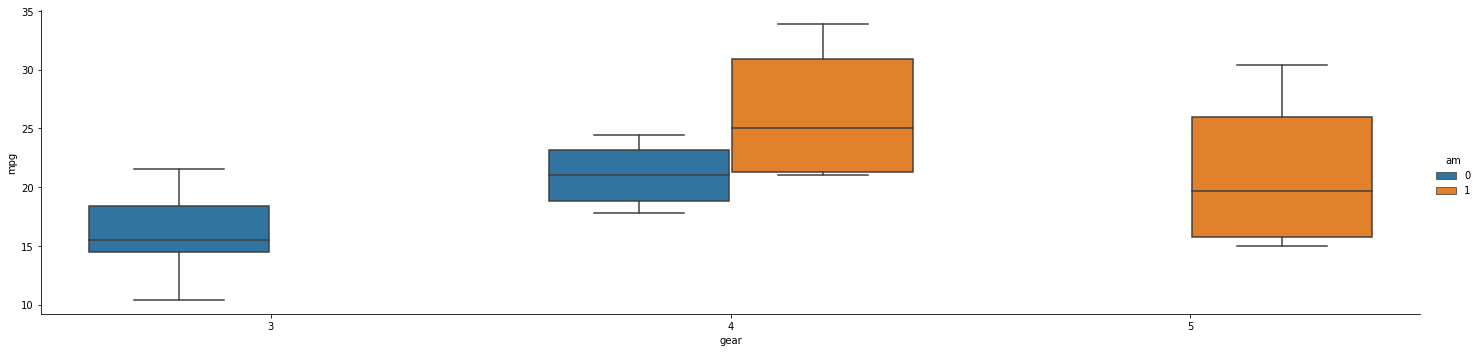

In [118]:
sns.catplot(x='gear',y='mpg',hue='am',kind='box',data=mtcar,aspect=4)

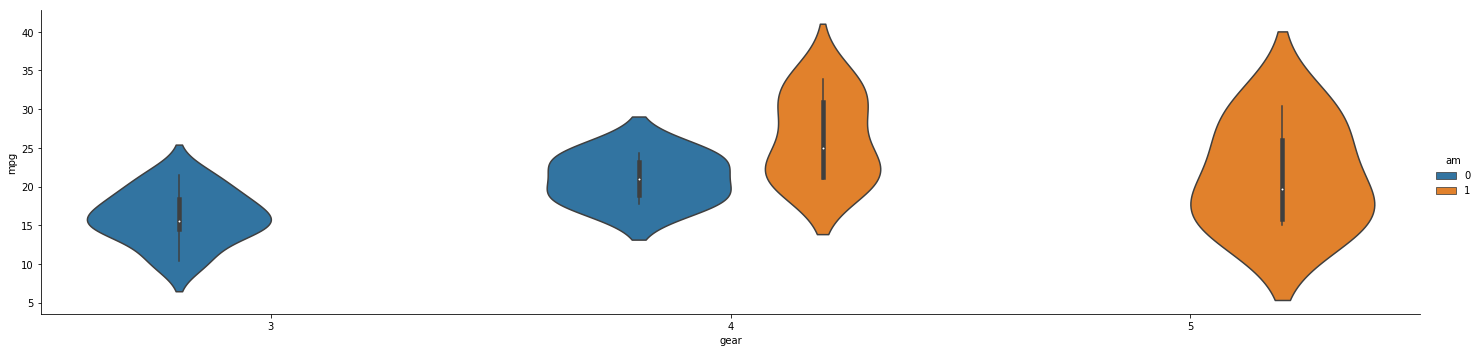

In [119]:
# violin plot
sns.catplot(x='gear',y='mpg',hue='am',kind='violin',data=mtcar,aspect=4)

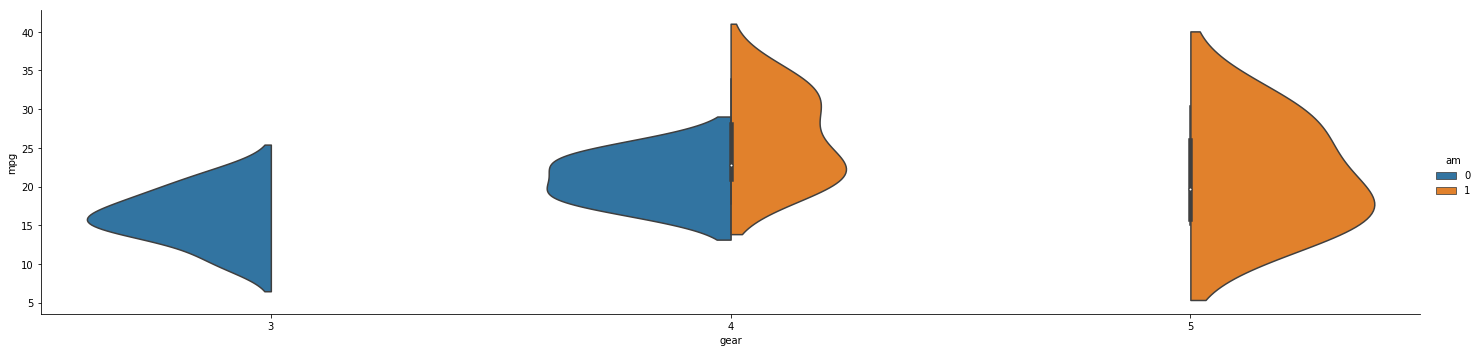

In [120]:
# violin plot split data
sns.catplot(x='gear',y='mpg',hue='am',kind='violin',split=True,data=mtcar,aspect=4)

> ### Conculsion: 

### univarient analysis
1. Count number of automatics and manual tranmission cars are available in dataset (mtcar)
2. Count number of 'carb' with different categories


In [122]:
amgroup = mtcar.groupby(by='am')

In [124]:
amgroup.count()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
am,,,,,,,,,,,
0,19,19,19,19,19,19,19,19,19,19,19
1,13,13,13,13,13,13,13,13,13,13,13


In [125]:
mtcar['am'].value_counts()

0    19
1    13
Name: am, dtype: int64

In [126]:
mtcar['carb'].value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

## Bivarient or multivarient Questions
> (1) 
- count each categories w.r.t "carb"
- in that count number of automatic and manual transmission

> (2)
- count each categories w.r.t "carb"
- in that count number categories w.r.t *number of gears*
- in that count manual and automatic transmission

In [127]:
# question - 1
carb_am = mtcar.groupby(by=['carb','am'])
carb_am.count()

model  mpg  cyl  disp  hp  drat  wt  qsec  vs  gear
carb am                                                     
1    0       3    3    3     3   3     3   3     3   3     3
     1       4    4    4     4   4     4   4     4   4     4
2    0       6    6    6     6   6     6   6     6   6     6
     1       4    4    4     4   4     4   4     4   4     4
3    0       3    3    3     3   3     3   3     3   3     3
4    0       7    7    7     7   7     7   7     7   7     7
     1       3    3    3     3   3     3   3     3   3     3
6    1       1    1    1     1   1     1   1     1   1     1
8    1       1    1    1     1   1     1   1     1   1     1

> #### 0 = Automatic , 1 = manual

In [128]:
# question - 2
carb_gear_am = mtcar.groupby(by=['carb','gear','am'])
carb_gear_am.count()

model  mpg  cyl  disp  hp  drat  wt  qsec  vs
carb gear am                                               
1    3    0       3    3    3     3   3     3   3     3   3
     4    1       4    4    4     4   4     4   4     4   4
2    3    0       4    4    4     4   4     4   4     4   4
     4    0       2    2    2     2   2     2   2     2   2
          1       2    2    2     2   2     2   2     2   2
     5    1       2    2    2     2   2     2   2     2   2
3    3    0       3    3    3     3   3     3   3     3   3
4    3    0       5    5    5     5   5     5   5     5   5
     4    0       2    2    2     2   2     2   2     2   2
          1       2    2    2     2   2     2   2     2   2
     5    1       1    1    1     1   1     1   1     1   1
6    5    1       1    1    1     1   1     1   1     1   1
8    5    1       1    1    1     1   1     1   1     1   1

# Contd ...